In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

from xgboost import XGBClassifier, plot_importance

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [237]:
df = pd.read_csv('Cleaned_data.csv')

In [238]:
df.head(2)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


## Data Description

Age: The age of the person

Occupation: The occupation of the person

Annual_Income: The Annual Income of the person

Monthly_Inhand_Salary: Monthly in-hand salary of the person

Num_Bank_Accounts: The number of bank accounts of the person

Num_Credit_Card: Number of credit cards the person is having

Num_of_Loan: The number of loans taken by the person from the bank

Delay_from_due_date: The average number of days delayed by the person from the date of payment

Num_of_Delayed_Payment: Number of payments delayed by the person

Changed_Credit_Card: The percentage change in the credit card limit of the person

Num_Credit_Inquiries: The number of credit card inquiries by the person

Credit_Mix: Classification of Credit Mix of the customer

Outstanding_Debt: The outstanding balance of the person

Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer

Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.

Total_EMI_per_month: The total EMI per month of the person

Amount_invested_monthly: The monthly amount invested by the person

Payment_Behaviour: The payment behaviour of the person

Monthly_Balance: The monthly balance left in the account of the person

Credit_Score: The credit score of the person

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29283 entries, 0 to 29282
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       29283 non-null  float64
 1   Occupation                29283 non-null  object 
 2   Annual_Income             29283 non-null  float64
 3   Monthly_Inhand_Salary     29283 non-null  float64
 4   Num_Bank_Accounts         29283 non-null  float64
 5   Num_Credit_Card           29283 non-null  float64
 6   Num_of_Loan               29283 non-null  float64
 7   Delay_from_due_date       29283 non-null  int64  
 8   Num_of_Delayed_Payment    29283 non-null  float64
 9   Changed_Credit_Limit      29283 non-null  float64
 10  Num_Credit_Inquiries      29283 non-null  float64
 11  Credit_Mix                29283 non-null  object 
 12  Outstanding_Debt          29283 non-null  float64
 13  Credit_Utilization_Ratio  29283 non-null  float64
 14  Paymen

In [141]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000,29283.000000
mean,32.961411,46312.763241,3858.048802,5.519619,5.648465,3.913158,22.013079,13.721545,10.810584,6.096472,1501.956588,32.183770,99.742007,176.717762,379.800796
std,10.704621,35764.761590,2986.618099,2.564591,2.072217,2.200507,15.192735,6.202179,6.781960,3.908420,1183.370081,5.060380,80.028528,171.933696,192.018239
min,14.000000,7005.930000,303.645417,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,21.027665,4.462837,0.000000,0.131136
25%,24.000000,18284.485000,1540.548333,4.000000,4.000000,2.000000,10.000000,9.000000,5.630000,3.000000,599.480000,28.010239,38.862489,67.716964,264.498467
50%,33.000000,34636.640000,2883.790833,6.000000,6.000000,4.000000,19.000000,14.000000,9.700000,6.000000,1237.120000,32.171236,72.123812,120.804477,323.284979
75%,41.000000,64918.540000,5407.990000,8.000000,7.000000,5.000000,29.000000,18.000000,15.460000,9.000000,2120.260000,36.403119,142.915191,216.681021,439.910592
max,56.000000,179317.040000,15204.633333,10.000000,10.000000,9.000000,67.000000,28.000000,36.290000,17.000000,4998.070000,49.564519,357.406068,1607.303468,1552.946094


In [142]:
df.describe(include='object').T

,count,unique,top,freq
Occupation,29283,15,Lawyer,2138
Credit_Mix,29283,3,Standard,13673
Payment_of_Min_Amount,29283,2,Yes,18599
Payment_Behaviour,29283,6,Low_spent_Small_value_payments,8325
Credit_Score,29283,3,Standard,15564


In [143]:
df['Credit_Score'].value_counts()

Standard    15564
Poor         9190
Good         4529
Name: Credit_Score, dtype: int64

In [241]:
df['Credit_Score'].value_counts(normalize=True)

Standard    0.531503
Poor        0.313834
Good        0.154663
Name: Credit_Score, dtype: float64

## Scaling & Encoding

In [144]:
X=df.drop(columns='Credit_Score')
X.head(2)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168


In [145]:
def condition(x):
    if x == "Good":
        return 1
    elif x == "Standard":
        return 2
    else:
        return 3

y = df['Credit_Score'].apply(condition)

In [146]:
y

0        1
1        2
2        1
3        1
4        1
        ..
29278    2
29279    2
29280    3
29281    2
29282    2
Name: Credit_Score, Length: 29283, dtype: int64

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
ss = StandardScaler()

In [149]:
num_col = X.select_dtypes(include='number').columns
num_col

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [150]:
X.loc[:,num_col] =ss.fit_transform(X.loc[:,num_col])

In [151]:
X

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,-0.930587,Scientist,-0.760500,-0.680783,-0.982481,-0.795522,0.039465,-1.251480,-0.922521,0.067742,-0.536408,Good,-0.584761,-1.906248,No,-0.626875,0.009459,Low_spent_Small_value_payments,-0.704297
1,-0.930587,Scientist,-0.760500,-0.680783,-0.982481,-0.795522,0.039465,-1.251480,-1.244994,0.067742,-0.536408,Good,-0.584761,-1.630335,No,-0.626875,-0.883684,High_spent_Medium_value_payments,-0.112890
2,-0.463491,Teacher,-0.320570,-0.274584,-1.372413,-0.795522,-1.323880,-0.988192,-2.051176,-0.499950,-1.048133,Good,-0.757956,1.258243,No,-1.011229,-0.792915,High_spent_Large_value_payments,0.545741
3,-0.463491,Teacher,-0.320570,-0.274584,-1.372413,-0.795522,-1.323880,-1.251480,-2.051176,-0.647403,-1.048133,Good,-0.757956,0.552166,No,-1.011229,-0.271053,Low_spent_Small_value_payments,0.338860
4,-0.463491,Teacher,-0.320570,-0.274584,-1.372413,-0.795522,-1.323880,-1.251480,-2.212413,-0.794855,-1.048133,Good,-0.757956,0.236595,No,-1.011229,-0.774966,High_spent_Large_value_payments,0.529669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29278,0.657539,Scientist,2.060626,2.137815,-0.202616,-2.243271,0.039465,-0.527437,-2.051176,-0.598743,-1.559857,Good,-0.891914,0.920073,No,1.634274,0.121613,High_spent_Large_value_payments,2.376491
29279,-0.837168,Lawyer,0.379043,0.419555,-0.592549,0.652228,0.039465,-0.922370,-0.116339,-0.696062,-0.536408,Good,-0.916243,-0.517902,No,0.060980,-0.088251,High_spent_Medium_value_payments,0.599642
29280,-0.183233,Developer,-0.489763,-0.495322,0.187316,0.169645,0.493914,0.394071,1.173552,-1.184130,0.487041,Bad,0.743984,0.589751,Yes,-0.218761,0.290451,Low_spent_Medium_value_payments,-0.889607
29281,-0.089814,Developer,-0.489763,-0.495322,0.187316,0.169645,0.493914,0.525716,1.496025,-1.184130,0.487041,Bad,0.743984,-1.308419,Yes,-0.218761,-0.682436,High_spent_Large_value_payments,-0.226798


In [152]:
from sklearn.preprocessing import OneHotEncoder

In [153]:
cat_col = X.select_dtypes(exclude='number')

In [154]:
encoded_cat_col = pd.get_dummies(cat_col, drop_first=True)

In [155]:
encoded_cat_col.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [156]:
X.drop(columns=cat_col, inplace=True)

In [157]:
X = X.join(encoded_cat_col)

In [158]:
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.930587,-0.76050,-0.680783,-0.982481,-0.795522,0.039465,-1.251480,-0.922521,0.067742,-0.536408,...,0,0,1,0,0,0,0,0,0,1
1,-0.930587,-0.76050,-0.680783,-0.982481,-0.795522,0.039465,-1.251480,-1.244994,0.067742,-0.536408,...,0,0,1,0,0,1,0,0,0,0
2,-0.463491,-0.32057,-0.274584,-1.372413,-0.795522,-1.323880,-0.988192,-2.051176,-0.499950,-1.048133,...,1,0,1,0,0,0,0,0,0,0
3,-0.463491,-0.32057,-0.274584,-1.372413,-0.795522,-1.323880,-1.251480,-2.051176,-0.647403,-1.048133,...,1,0,1,0,0,0,0,0,0,1
4,-0.463491,-0.32057,-0.274584,-1.372413,-0.795522,-1.323880,-1.251480,-2.212413,-0.794855,-1.048133,...,1,0,1,0,0,0,0,0,0,0


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=5)

In [161]:
X_train.shape,X_test.shape

((20498, 37), (8785, 37))

In [162]:
y_train.value_counts().sort_index(),y_test.value_counts().sort_index()

(1     3164
 2    10878
 3     6456
 Name: Credit_Score, dtype: int64,
 1    1365
 2    4686
 3    2734
 Name: Credit_Score, dtype: int64)

## KNN K-Nearest Neighbor

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV, KFold

In [25]:
knn =KNeighborsClassifier()

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
knn_predict = knn.predict(X_test)

In [28]:
confusion_matrix(y_test,knn_predict)

array([[ 871,  468,   26],
       [ 506, 3512,  668],
       [ 186,  834, 1714]], dtype=int64)

In [29]:
cm = confusion_matrix(y_test,knn_predict)

In [30]:
pd.DataFrame(data=cm, index=['Actual: 1', 'Actual: 2','Actual: 3'], columns=['Predicted: 1', 'Predicted: 2','Predicted: 3'])

,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,871,468,26
Actual: 2,506,3512,668
Actual: 3,186,834,1714


In [31]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           1       0.56      0.64      0.59      1365
           2       0.73      0.75      0.74      4686
           3       0.71      0.63      0.67      2734

    accuracy                           0.69      8785
   macro avg       0.67      0.67      0.67      8785
weighted avg       0.70      0.69      0.69      8785



In [33]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,params,cv=kf,scoring='f1_weighted')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [34]:
GS.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [35]:
knn_tuned=KNeighborsClassifier(n_neighbors=10,weights='uniform')
score=cross_val_score(knn_tuned,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.6805471644374412, 0.010886089685233314)

## DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
DT_be=[]
DT_ve=[]
for i in np.arange(1,10):
    DT=DecisionTreeClassifier(max_depth=i,random_state=0)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    scores=cross_val_score(DT,X_train,y_train,scoring='f1_weighted')
    DT_be.append(np.mean(1-scores))
    DT_ve.append(np.std(scores,ddof=1))

In [38]:
np.argmin(DT_ve),np.min(DT_ve)

(0, 0.0049775976925408695)

In [39]:
DT_tuned=DecisionTreeClassifier(max_depth=2,random_state=0)

In [40]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(DT_tuned,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.6492084362433087, 0.005495711673424737)

## RandomForestClassifier

In [41]:
RF_be=[]
RF_ve=[]
for i in np.arange(1,20):
    RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=0)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    scores=cross_val_score(RF,X_train,y_train,scoring='f1_weighted')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(scores,ddof=1))

In [42]:
np.argmin(RF_ve),np.min(RF_ve)

(9, 0.002306961767829414)

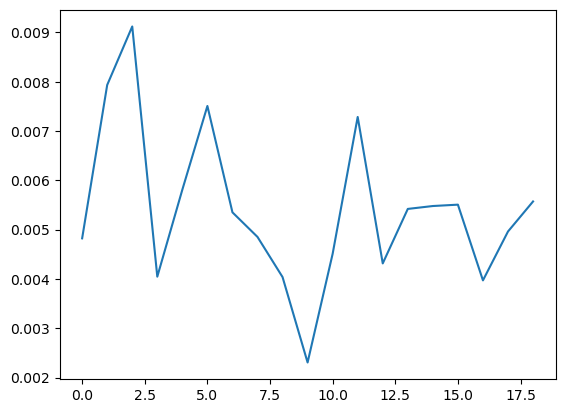

In [43]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [44]:
RF_tuned=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0)

In [50]:
RF_tuned.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [45]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(RF_tuned,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.717846384933882, 0.008008598201103903)

In [52]:
RF_predict = RF_tuned.predict(X_test)

In [54]:
cm_RF_tuned = confusion_matrix(y_test,RF_predict)

In [55]:
pd.DataFrame(data=cm_RF_tuned, index=['Actual: 1', 'Actual: 2','Actual: 3'], columns=['Predicted: 1', 'Predicted: 2','Predicted: 3'])

,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,928,403,34
Actual: 2,474,3576,636
Actual: 3,92,792,1850


In [57]:
print(classification_report(y_test,RF_predict))

              precision    recall  f1-score   support

           1       0.62      0.68      0.65      1365
           2       0.75      0.76      0.76      4686
           3       0.73      0.68      0.70      2734

    accuracy                           0.72      8785
   macro avg       0.70      0.71      0.70      8785
weighted avg       0.72      0.72      0.72      8785



In [62]:
accuracy_score(y_test,RF_predict)

0.7232783153101878

In [61]:
f1_score(y_test, RF_predict, average='weighted')

0.7234307180932232

## Ada Boost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [64]:
Ab=AdaBoostClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [66]:
GS.best_params_

{'n_estimators': 64}

In [67]:
Ab_dt=AdaBoostClassifier(n_estimators=64,random_state=0)

In [68]:
score=cross_val_score(Ab_dt,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.6720903694880929, 0.001669291826930817)

## Boosting the Random Forest

In [71]:
#Boosting the RF model
Ab=AdaBoostClassifier(base_estimator=RF_tuned,random_state=0)
params={'n_estimators':np.arange(1,20)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                                                random_state=0),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1_weighted')

In [72]:
GS.best_params_

{'n_estimators': 17}

In [73]:
Ab_RF = AdaBoostClassifier(estimator=RF_tuned,n_estimators=17, random_state=0)

In [75]:
Ab_RF.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=0),
                   n_estimators=17, random_state=0)

In [74]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score= cross_val_score(Ab_RF,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.7445618469372622, 0.007303225774999214)

In [76]:
Ab_RF_predict = Ab_RF.predict(X_test)

In [77]:
cm_Ab_RF = confusion_matrix(y_test,Ab_RF_predict)

In [79]:
pd.DataFrame(data=cm_Ab_RF, index=['Actual: 1', 'Actual: 2','Actual: 3'], columns=['Predicted: 1', 'Predicted: 2','Predicted: 3'])

,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,974,381,10
Actual: 2,391,3689,606
Actual: 3,99,623,2012


In [78]:
print(classification_report(y_test,Ab_RF_predict))

              precision    recall  f1-score   support

           1       0.67      0.71      0.69      1365
           2       0.79      0.79      0.79      4686
           3       0.77      0.74      0.75      2734

    accuracy                           0.76      8785
   macro avg       0.74      0.75      0.74      8785
weighted avg       0.76      0.76      0.76      8785



In [81]:
accuracy_score(y_test,Ab_RF_predict)

0.7598178713716562

In [80]:
f1_score(y_test, Ab_RF_predict, average='weighted')

0.7601521453268824

### GradientBoosting

In [93]:
GB=GradientBoostingClassifier(random_state=0)
params={'n_estimators':np.arange(1,50)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(GB,params,cv=kf,scoring='f1_weighted')
GS.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_weighted')

In [94]:
GS.best_params_

{'n_estimators': 45}

In [95]:
GB_tuned=GradientBoostingClassifier(n_estimators= 45,random_state=0)

In [96]:
GB_tuned.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=45, random_state=0)

In [97]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score= cross_val_score(GB_tuned,X_train,y_train,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.7147966361840918, 0.006081530047478666)

In [98]:
GB_tuned_predict = GB_tuned.predict(X_test)

In [100]:
cm_GB_tuned = confusion_matrix(y_test,GB_tuned_predict)

In [101]:
pd.DataFrame(data=cm_GB_tuned, index=['Actual: 1', 'Actual: 2','Actual: 3'], columns=['Predicted: 1', 'Predicted: 2','Predicted: 3'])

,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,946,401,18
Actual: 2,555,3493,638
Actual: 3,172,800,1762


In [102]:
print(classification_report(y_test,GB_tuned_predict))

              precision    recall  f1-score   support

           1       0.57      0.69      0.62      1365
           2       0.74      0.75      0.74      4686
           3       0.73      0.64      0.68      2734

    accuracy                           0.71      8785
   macro avg       0.68      0.69      0.68      8785
weighted avg       0.71      0.71      0.71      8785



## XGBClassifier

In [177]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Adjust target variable y_train to have classes starting from 0
y_train_adjusted = y_train - 1

XGB = XGBClassifier(random_state=0)

params = {
    'n_estimators': [96,97,98],
    'gamma': [0,0.1],
    'learning_rate': [0.2, 0.3,0.4]
}

kf = KFold(n_splits=3, shuffle=True, random_state=0)
GS = GridSearchCV(XGB, params, cv=kf, scoring='f1_weighted')

GS.fit(X_train, y_train_adjusted)


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': [96, 97, 98]},
             scoring='f1_weighted')

In [178]:
GS.best_params_

{'gamma': 0, 'learning_rate': 0.3, 'n_estimators': 97}

In [ ]:
XGB_tuned = XGBClassifier(random_state=0,gamma=0,learning_rate=0.3, n_estimators=97)

In [ ]:
XGB_tuned.fit(X_train,y_train_adjusted)

In [173]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score= cross_val_score(XGB_tuned,X_train,y_train_adjusted,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.7306766690295675, 0.00295803895316633)

In [179]:
score

array([0.729001  , 0.72893689, 0.73409212])

In [180]:
XGB_tuned_predict = XGB_tuned.predict(X_test)

In [183]:
cm_XGB_tuned = confusion_matrix(y_test-1,XGB_tuned_predict)

In [185]:
pd.DataFrame(data=cm_XGB_tuned, index=['Actual: 1', 'Actual: 2','Actual: 3'], columns=['Predicted: 1', 'Predicted: 2','Predicted: 3'])

,Predicted: 1,Predicted: 2,Predicted: 3
Actual: 1,904,429,32
Actual: 2,422,3583,681
Actual: 3,102,654,1978


In [186]:
print(classification_report(y_test-1,XGB_tuned_predict))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1365
           1       0.77      0.76      0.77      4686
           2       0.74      0.72      0.73      2734

    accuracy                           0.74      8785
   macro avg       0.71      0.72      0.71      8785
weighted avg       0.74      0.74      0.74      8785



## Fitting all models

In [200]:
models=[]
models.append(('KNN',knn_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))
models.append(('BoostedRF',Ab_RF))
models.append(('GBoost',GB_tuned))

In [202]:
for name, model in models:
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    score= cross_val_score(model,X_train,y_train,cv=kf,scoring='f1_weighted')
    print(name,end= ' - '), print(np.mean(score), end=' '), print(np.std(score,ddof=1))
    

KNN - 0.6805471644374412 0.010886089685233314
DecisionTree - 0.6492084362433087 0.005495711673424737
RandomForest - 0.717846384933882 0.008008598201103903
BoostedRF - 0.7445618469372622 0.007303225774999214
GBoost - 0.7147966361840918 0.006081530047478666


# Project Conclusion

Among all the models tested, the Boosted Random Forest achieved the highest performance, with an F1 score of 74.4. This indicates a good balance between precision and recall, making it the most effective model for this classification problem.

### Feature Importance

In [205]:
feature_importances = Ab_RF.feature_importances_

In [214]:
df_feature_importances  = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [236]:
df_feature_importances =df_feature_importances .sort_values(by= 'Importance', ascending=False)
df_feature_importances.head()

,Feature,Importance
8,Changed_Credit_Limit,0.118225
5,Num_of_Loan,0.073745
29,Credit_Mix_Good,0.073067
10,Outstanding_Debt,0.068599
13,Amount_invested_monthly,0.061579


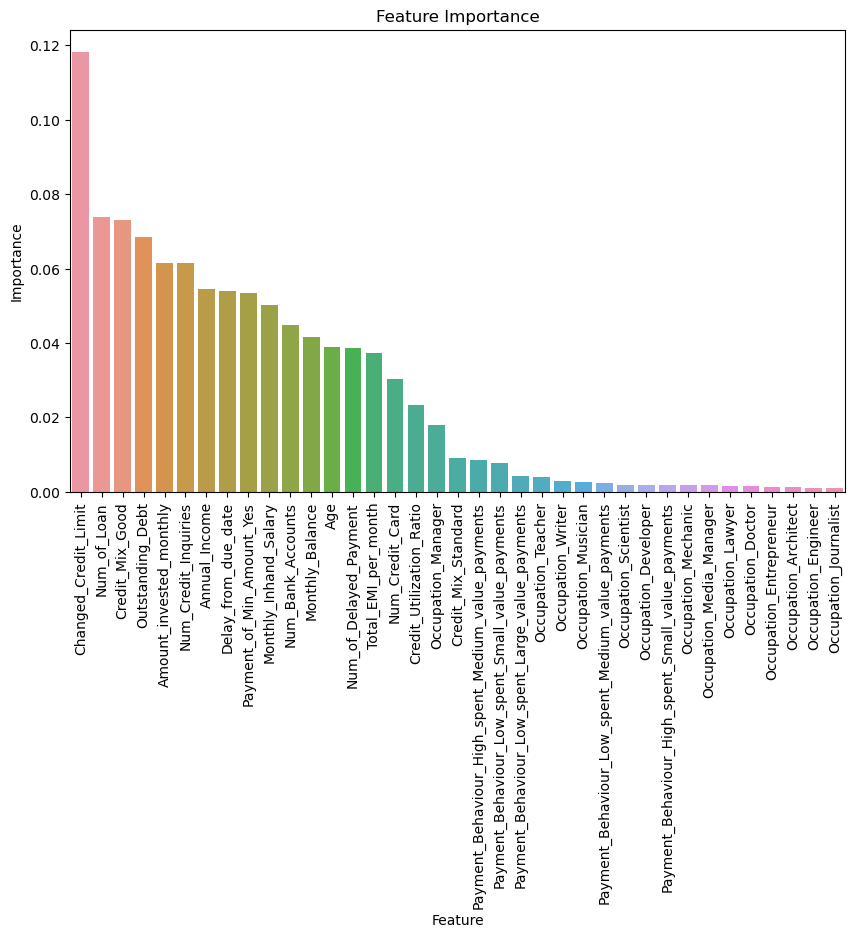

In [233]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
sns.barplot(data= df_feature_importances, x='Feature', y='Importance')
plt.xticks(rotation=90)
plt.show()

In [240]:
print(classification_report(y_test,Ab_RF_predict))

              precision    recall  f1-score   support

           1       0.67      0.71      0.69      1365
           2       0.79      0.79      0.79      4686
           3       0.77      0.74      0.75      2734

    accuracy                           0.76      8785
   macro avg       0.74      0.75      0.74      8785
weighted avg       0.76      0.76      0.76      8785



The Boosted Random Forest model demonstrated superior performance compared to other machine learning models, achieving an F1 score of 74.4. This indicates its strong ability to correctly classify credit scores while balancing precision and recall effectively.

Analysis of feature importance revealed that features such as [Changed_Credit_Limit, Num_of_Loan, Credit_Mix_Good, Outstanding_Debt, Amount_invested_monthly] played a significant role in predicting credit scores. This provides valuable insights into the factors most indicative of credit worthiness.